<a href="https://colab.research.google.com/github/BagusDAriAwan/creditcard-fraud/blob/master/percobaan1_UCSD_fitur_terbaik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()
import math
import collections
import time
# from scipy import stats

In [455]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# %matplotlib inline
# from IPython.display import display
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from statistics import stdev

from sklearn import tree

from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

In [0]:
# np.random.seed(1)

In [0]:
def confussion_matrik(actual,predict):
    TP,FP,FN,TN = 0,0,0,0
    for i,val in enumerate(actual):
        if val == 0:
            if val == predict[i]:
                TN += 1
            else:
                FP += 1
        if val == 1:
            if val == predict[i]:
                TP += 1
            else:
                FN += 1
    return TP,FP,FN,TN
 
def acc_sens_spec(actual,predict):
    TP,FP,FN,TN = confussion_matrik(actual,predict)
# akurasi
    if (TP+FP+FN+TN) == 0 :
        accuracy = 0 
    else :
        accuracy = (TP+TN)/(TP+FP+FN+TN)
        
# sensitivity
    if (TP+FN) == 0 :
        sensitivity = 0
    else :
        sensitivity = TP/(TP+FN)
        
# specifity    
    if (TN +FP) == 0 :
        specifity = 0
    else :
        specifity = TN/(TN +FP)
        
# precision
    if (TP+FP) == 0 :
        precision = 0
    else :
        precision = TP/(TP+FP)

# recall
    recall = sensitivity

# f1_score
    if (precision+recall) == 0 :
        f1_score = 0
    else :
        f1_score = 2*((precision*recall)/(precision+recall))  
    
    return accuracy,sensitivity,specifity,precision,recall,f1_score


In [0]:
def convert(y):
    for i in range(y.shape[0]):
        if y[i]==-1:
            y[i]=1;
        else:
            y[i]=0
    return y

In [0]:
from sklearn.ensemble import IsolationForest
def iForest(X, ntree, sample, th):
    ifor = IsolationForest(n_estimators=ntree, max_samples=sample, contamination=th, random_state=1)
#     ifor = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.0039, max_features=1.0, random_state=42, verbose=0)
    ifor.fit(X)
    return ifor

In [0]:
# accuracy,sensitivity,specifity = acc_sens_spec(y,pred)
# print('acc',accuracy)
# print('sens',sensitivity)
# print('spec',specifity)

In [0]:
# accuracy_metric(y,RF.predict(X))

In [0]:
from sklearn.decomposition import PCA
import pylab as pl
def plot_this(X_rs,y_rs,method):
  # Use principal component to condense the 10 features to 2 features
  pca = PCA(n_components=2).fit(X_rs)
  pca_2d = pca.transform(X_rs)
  # Assign colors
  for i in range(0, pca_2d.shape[0]):
    if y_rs[i] == 0:
      c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
    elif y_rs[i] == 1:
      c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='*')  
  pl.legend([c1, c2], ['Class 1', 'Class 2'])
  pl.title(method)
  pl.axis([-4, 5, -4, 4])  # x axis (-4,5), y axis (-4,4)
  pl.show()
    


In [0]:
def model_evaluate(ifor,X,y):
    ts = time.time()
    y_pred=ifor.predict(X)
    tf = time.time()
    print('time : ', tf-ts)
    y_pred=convert(y_pred)
    
    accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y,y_pred)
    print('accuracy : ',accuracy)
    print('sensitivity : ',sensitivity)
    print('specifity : ', specifity)
    print('precision : ',precision)
    print('recall : ',recall)
    print('f1 score : ',f1_score)
    print('Confusion matrix')
    TP,FP,FN,TN = confussion_matrik(y,y_pred)
    print('TP = ',TP,'FP = ',FP,'FN = ',FN,'TN = ',TN)
    df_cm = pd.DataFrame([[TN,FP],[FN,TP]],
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
    plt.figure(figsize = (8,4))
    sb.set(font_scale=1.4)#for label size
    sb.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

In [0]:
def eval_model(ifor,X,y):
#     ts = time.time()
    y_pred=ifor.predict(X)
#     tf = time.time()
    y_pred=convert(y_pred)
    accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y,y_pred)
    return accuracy,sensitivity,specifity,precision,recall,f1_score

## ---------

In [0]:
df=pd.read_csv("drive/My Drive/Colab Notebooks/UCSD/ucsdInputs.csv")
df['Class']=pd.read_csv("drive/My Drive/Colab Notebooks/UCSD/ucsdTargets.csv", header = None)

In [467]:
df.head()

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,Class
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,12.95,-723,19,0,0,0,0,0,1,0
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,5497,14,1,0,0,1,0,1,0
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-4420,23,0,0,1,1,0,1,0
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,5010,31,0,0,1,0,0,1,0
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-4074,21,0,0,1,0,0,1,0


In [468]:
df.tail()

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,Class
99995,31.08,14,GA,313,1234567890197181,2,owdybxinfiqla@ucxhcpouwmc.net,0,14,1,31.08,-8044,10,0,0,0,0,0,1,0
99996,49.95,14,LA,704,1234567890197182,0,vnmhghmwnxhso@xnzysnub.com,0,14,0,49.95,393,18,1,0,1,0,0,1,0
99997,11.01,14,NY,117,1234567890196488,3,uphjcxjkubtrw@aol.com,1,14,1,11.01,4261,11,0,0,1,1,0,1,0
99998,12.95,14,VA,245,1234567890197183,3,sasmynlsqebdv65@aol.com,1,14,0,12.95,515,21,0,0,0,0,0,1,0
99999,12.95,14,TN,372,1234567890197184,3,kvclngihgwldo@yahoo.com,1,14,0,12.95,4229,22,0,0,0,1,0,1,0


In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
amount        100000 non-null float64
hour1         100000 non-null int64
state1        99999 non-null object
zip1          100000 non-null int64
custAttr1     100000 non-null int64
field1        100000 non-null int64
custAttr2     100000 non-null object
field2        100000 non-null int64
hour2         100000 non-null int64
flag1         100000 non-null int64
total         100000 non-null float64
field3        100000 non-null int64
field4        100000 non-null int64
indicator1    100000 non-null int64
indicator2    100000 non-null int64
flag2         100000 non-null int64
flag3         100000 non-null int64
flag4         100000 non-null int64
flag5         100000 non-null int64
Class         100000 non-null int64
dtypes: float64(2), int64(16), object(2)
memory usage: 15.3+ MB


In [470]:
df.shape

(100000, 20)

In [471]:
df['Class'].value_counts()

0    97346
1     2654
Name: Class, dtype: int64

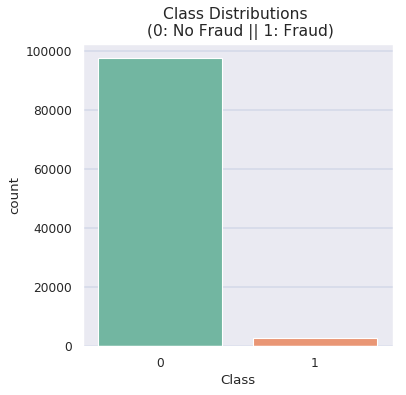

In [472]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sb.countplot('Class', data=df,palette='Set2')


In [473]:
count = 0
for a in df.columns:
    if df[a].isnull().sum() > 0 :
        print(a)
        count+=1
count

state1


1

In [474]:
df['state1'].unique()

array(['WA', 'KY', 'CA', 'GA', 'AZ', 'MO', 'TX', 'IL', 'HI', 'UT', 'NC',
       'NY', 'FL', 'MN', 'VA', 'MA', 'IN', 'LA', 'TN', 'MD', 'NJ', 'ID',
       'OH', 'PA', 'SC', 'AL', 'MI', 'WI', 'DC', 'AR', 'CT', 'OR', 'OK',
       'SD', 'NH', 'NM', 'NV', 'NE', 'MS', 'ND', 'CO', 'KS', 'WV', 'RI',
       'ME', 'IA', 'MT', 'WY', 'AK', 'VT', 'DE', 'AP', 'AE', 'PR', nan],
      dtype=object)

In [0]:
df['state1'] =df['state1'].fillna('CA')

In [476]:
df.iloc[80876:80877]

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,Class
80876,49.95,20,CA,9,1234567890183719,3,womaeenhfvtfu@hotmail.com,0,20,0,49.95,3166,23,1,0,1,0,0,1,0


In [477]:
len(df.columns)

20

3.2. Data Preprocessing
The hard version of the dataset contains two sub datasets—training set and testing set. The training set is labeled and the testing set is unlabeled. We have used only the labeled training dataset. It contains 100000 transactions of 73729 customers spanning over a period of 98 days. The dataset contains 20 fields including class labels—amount, hour1, state1, zip1, custAttr1, field1, custAttr2, field2, hour2, flag1, total, field3, field4, indicator1, indicator2, flag2, flag3, flag4, flag5, and Class. It is found that custAttr1 is the account/card number and custAttr2 is e-mail id of the customer. Both these fields are unique to a particular customer and thus we decided to keep only custAttr1. The fields total and amount as well as hour1 and hour2 are found to be the same for each customer and thus we removed total and hour2. Similarly state1 and zip1 are also found to be representing the same information and thus we removed state1. All other fields are anonymized and therefore we decided to keep them as they are. Thus our final dataset contains 16 fields—amount, hour1, zip1, custAttr1, field1, field2, flag1, field3, field4, indicator1, indicator2, flag2, flag3, flag4, flag5, and Class.

In [478]:
df.tail()

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,Class
99995,31.08,14,GA,313,1234567890197181,2,owdybxinfiqla@ucxhcpouwmc.net,0,14,1,31.08,-8044,10,0,0,0,0,0,1,0
99996,49.95,14,LA,704,1234567890197182,0,vnmhghmwnxhso@xnzysnub.com,0,14,0,49.95,393,18,1,0,1,0,0,1,0
99997,11.01,14,NY,117,1234567890196488,3,uphjcxjkubtrw@aol.com,1,14,1,11.01,4261,11,0,0,1,1,0,1,0
99998,12.95,14,VA,245,1234567890197183,3,sasmynlsqebdv65@aol.com,1,14,0,12.95,515,21,0,0,0,0,0,1,0
99999,12.95,14,TN,372,1234567890197184,3,kvclngihgwldo@yahoo.com,1,14,0,12.95,4229,22,0,0,0,1,0,1,0


In [0]:
df = df.drop(['custAttr2','total','hour2','state1',], axis=1)

In [480]:
len(df.columns)

16

3.3. Training and Testing Dataset Creation
The following procedures are used for creating training and testing datasets for evaluating our model.

First, we removed the transactions corresponding to those customers who have only one transaction in dataset since it appears either in training or testing dataset only. Now the dataset has been reduced to 40918 transactions.

Then we divided these 40918 transactions into two sets—training set with 21000 transactions and testing set with 19918 transactions.

Again from the training dataset we removed the transactions corresponding to those customers who have only one transaction in the training dataset since it is hard to find a pattern from a single transaction. Now the training dataset has been reduced to 19165 transactions.

From this dataset, we have randomly selected different groups of customers and their corresponding transactions in the training and testing dataset to create different training and testing datasets to evaluate the performance of FraudMiner with increasing number of transactions. The data distribution is shown in Table 1.

In [481]:
df['frek'] = df.groupby('custAttr1')['custAttr1'].transform('count')
df['frek'].value_counts()

1     59082
2     19068
3      8697
4      4068
5      2285
6      1512
7       994
8       632
9       603
10      480
11      352
14      280
15      240
12      204
17      170
13      169
21      147
18      126
20      100
32       96
68       68
22       66
16       64
63       63
57       57
50       50
24       48
46       46
44       44
39       39
19       38
34       34
28       28
27       27
23       23
Name: frek, dtype: int64

In [482]:
df.shape

(100000, 17)

In [483]:
df = df[df['frek'] > 1]
df.shape

(40918, 17)

In [484]:
df.tail()

,amount,hour1,zip1,custAttr1,field1,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,Class,frek
99976,25.90,14,958,1234567890157691,3,0,1,2186,9,0,0,1,0,0,1,0,18
99981,33.67,14,366,1234567890197161,3,1,1,4177,6,0,0,1,1,0,2,0,2
99988,12.95,14,787,1234567890137953,3,0,1,3357,10,1,0,1,1,0,2,0,19
99992,10.36,14,953,1234567890194145,3,1,1,5169,8,0,0,0,0,0,1,0,2
99997,11.01,14,117,1234567890196488,3,1,1,4261,11,0,0,1,1,0,1,0,2


In [485]:
df = df.reset_index(drop=True)
df.tail()

,amount,hour1,zip1,custAttr1,field1,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,Class,frek
40913,25.90,14,958,1234567890157691,3,0,1,2186,9,0,0,1,0,0,1,0,18
40914,33.67,14,366,1234567890197161,3,1,1,4177,6,0,0,1,1,0,2,0,2
40915,12.95,14,787,1234567890137953,3,0,1,3357,10,1,0,1,1,0,2,0,19
40916,10.36,14,953,1234567890194145,3,1,1,5169,8,0,0,0,0,0,1,0,2
40917,11.01,14,117,1234567890196488,3,1,1,4261,11,0,0,1,1,0,1,0,2


In [486]:
df['Class'].value_counts()

0    39722
1     1196
Name: Class, dtype: int64

In [0]:
df = df.drop(['custAttr1'], axis=1)
# df = df.drop(['frek'], axis=1)

In [0]:
X = df.drop('Class', axis=1)
y = df['Class'].copy()

In [489]:
y.value_counts()

0    39722
1     1196
Name: Class, dtype: int64

In [490]:
X.columns

Index(['amount', 'hour1', 'zip1', 'field1', 'field2', 'flag1', 'field3',
       'field4', 'indicator1', 'indicator2', 'flag2', 'flag3', 'flag4',
       'flag5', 'frek'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split

## percobaan 1.0 - semua fitur

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11111, random_state=1, stratify=y_train)


In [493]:
X_train.head()

,amount,hour1,zip1,field1,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,frek
12833,10.36,20,982,3,1,1,-7219,14,0,0,0,0,0,2,6
39634,11.01,14,232,3,0,1,991,7,1,0,1,1,0,1,4
9529,49.95,18,752,3,1,0,-90,15,0,0,1,0,0,2,2
14625,31.08,14,921,3,0,1,-5751,14,0,0,1,1,0,1,2
680,12.95,8,277,3,1,1,2531,9,0,0,0,0,0,1,2


In [0]:
y_test0 = np.array(y_test)
y_train0=np.array(y_train)
y_val0 = np.array(y_val)

In [495]:
print(len(X_train),len(X_val),len(X_test))

32734 4092 4092


In [496]:
ytrain_ab = y_train[y_train==1]
yval_ab = y_val[y_val==1]
ytest_ab = y_test[y_test==1]
print('fraud train =',len(ytrain_ab),'fraud val =',len(yval_ab),'fraud test =',len(ytest_ab))

fraud train = 956 fraud val = 120 fraud test = 120


In [497]:
th_train=len(ytrain_ab)/len(y_train)
th_test=len(ytest_ab)/len(y_test)
th_val=len(yval_ab)/len(y_val)
print('threshold train =',th_train, 'threshold test =', th_test,'threshold val =', th_val)

threshold train = 0.029205107838944217 threshold test = 0.02932551319648094 threshold val = 0.02932551319648094


In [498]:
nTree= 100
sample = 256
ifo = iForest(X_train, nTree, sample, th_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.20269203186035156
accuracy :  0.9452590420332356
sensitivity :  0.058333333333333334
specifity :  0.9720543806646526
precision :  0.059322033898305086
recall :  0.058333333333333334
f1 score :  0.058823529411764705
Confusion matrix
TP =  7 FP =  111 FN =  113 TN =  3861


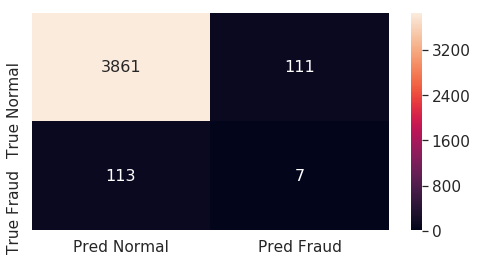

In [499]:
model_evaluate(ifo,X_val,y_val0)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.22926783561706543
accuracy :  0.9481915933528837
sensitivity :  0.058333333333333334
specifity :  0.9750755287009063
precision :  0.0660377358490566
recall :  0.058333333333333334
f1 score :  0.061946902654867256
Confusion matrix
TP =  7 FP =  99 FN =  113 TN =  3873


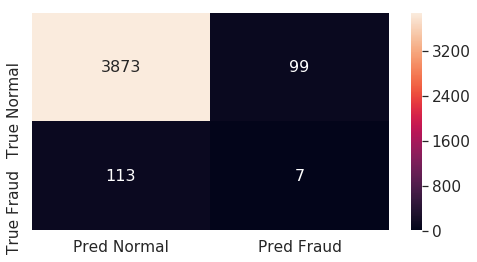

In [500]:
model_evaluate(ifo, X_test, y_test0)

### percobaan1.1- 3 fitur terbaik

In [501]:
X1 = X[['field3','zip1','frek']]
X1.head()

,field3,zip1,frek
0,-2753,852,3
1,2429,950,6
2,2429,950,6
3,5195,750,2
4,809,601,2


In [502]:
y.value_counts()

0    39722
1     1196
Name: Class, dtype: int64

In [0]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=1, stratify=y)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.25, random_state=1, stratify=y1_train)

In [504]:
X1_train.head()

,field3,zip1,frek
21631,4195,941,3
40117,-3871,103,2
31005,7656,440,7
21416,1995,391,2
22202,2009,510,15


In [505]:
print(len(X1_train),len(X1_val),len(X1_test))

24550 8184 8184


In [506]:
y1train_ab = y1_train[y1_train==1]
y1val_ab = y1_val[y1_val==1]
y1test_ab = y1_test[y1_test==1]
print('fraud train =',len(y1train_ab),'fraud val =',len(y1val_ab),'fraud test =',len(ytest_ab))

fraud train = 718 fraud val = 239 fraud test = 120


In [0]:
y_test1 = np.array(y1_test)
y_train1=np.array(y1_train)
y_val1 = np.array(y1_val)

In [508]:
th_train1=len(y1train_ab)/len(y1_train)
th_test1=len(y1test_ab)/len(y1_test)
th_val1=len(y1val_ab)/len(y1_val)
print('threshold train =',th_train1, 'threshold test =', th_test1,'threshold val =', th_val1)

threshold train = 0.029246435845213848 threshold test = 0.029203323558162266 threshold val = 0.029203323558162266


In [509]:
ifo1 = iForest(X1_train, 100, 256, th_train1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.309401273727417
accuracy :  0.9412267839687195
sensitivity :  0.06694560669456066
specifity :  0.9675267463813719
precision :  0.058394160583941604
recall :  0.06694560669456066
f1 score :  0.06237816764132554
Confusion matrix
TP =  16 FP =  258 FN =  223 TN =  7687


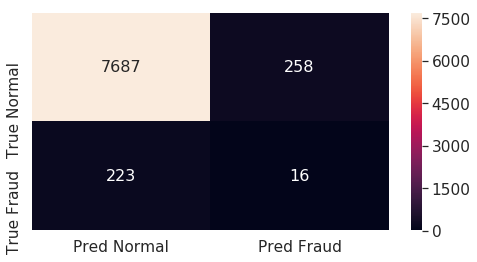

In [510]:
model_evaluate(ifo1,X1_val,y_val1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.3040478229522705
accuracy :  0.946236559139785
sensitivity :  0.08368200836820083
specifity :  0.9721837633731907
precision :  0.08298755186721991
recall :  0.08368200836820083
f1 score :  0.08333333333333334
Confusion matrix
TP =  20 FP =  221 FN =  219 TN =  7724


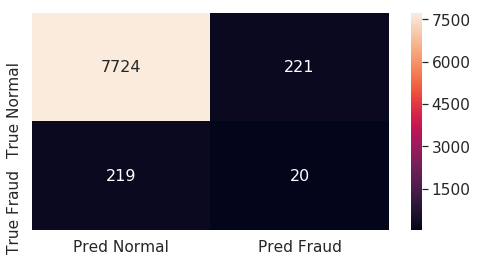

In [511]:
model_evaluate(ifo1, X1_test, y_test1)

### percobaan1.2 - 5 fitur terbaik

In [512]:
X2 = X[['field3','zip1','frek','field4','hour1']]
X2.head()

,field3,zip1,frek,field4,hour1
0,-2753,852,3,24,0
1,2429,950,6,14,0
2,2429,950,6,14,0
3,5195,750,2,9,0
4,809,601,2,7,1


In [0]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=1, stratify=y)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.25, random_state=1, stratify=y2_train)

In [514]:
print(len(X2_train),len(X2_val),len(X2_test))

24550 8184 8184


In [0]:
y2train_ab = y2_train[y2_train==1]
y2val_ab = y2_val[y2_val==1]
y2test_ab = y2_test[y2_test==1]

In [0]:
y_test2 = np.array(y2_test)
y_train2=np.array(y2_train)
y_val2 = np.array(y2_val)

In [517]:
th_train2=len(y2train_ab)/len(y2_train)
th_test2=len(y2test_ab)/len(y2_test)
th_val2=len(y2val_ab)/len(y2_val)
print('threshold train =',th_train2, 'threshold test =', th_test2,'threshold val =', th_val2)

threshold train = 0.029246435845213848 threshold test = 0.029203323558162266 threshold val = 0.029203323558162266


In [518]:
ifo2 = iForest(X2_train, 100, 256, th_train2)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.3158748149871826
accuracy :  0.9385386119257088
sensitivity :  0.07112970711297072
specifity :  0.9646318439269981
precision :  0.05704697986577181
recall :  0.07112970711297072
f1 score :  0.0633147113594041
Confusion matrix
TP =  17 FP =  281 FN =  222 TN =  7664


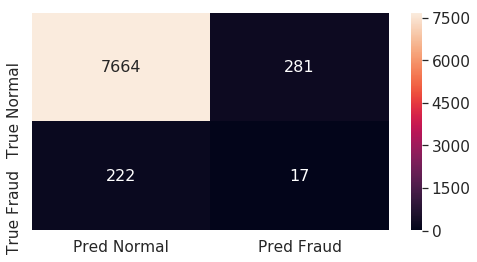

In [519]:
model_evaluate(ifo2,X2_val,y_val2)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.3178126811981201
accuracy :  0.9446480938416423
sensitivity :  0.100418410041841
specifity :  0.9700440528634361
precision :  0.0916030534351145
recall :  0.100418410041841
f1 score :  0.09580838323353294
Confusion matrix
TP =  24 FP =  238 FN =  215 TN =  7707


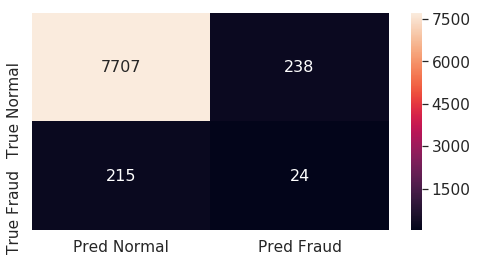

In [520]:
model_evaluate(ifo2, X2_test, y_test2)

### percobaan1.3 - 7 fitur terbaik

In [521]:
X3 = X[['field3','zip1','frek','field4','hour1','amount','flag2']]
X3.head()

,field3,zip1,frek,field4,hour1,amount,flag2
0,-2753,852,3,24,0,12.95,1
1,2429,950,6,14,0,11.01,0
2,2429,950,6,14,0,12.95,0
3,5195,750,2,9,0,12.95,1
4,809,601,2,7,1,12.95,0


In [0]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=1, stratify=y)
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train, y3_train, test_size=0.25, random_state=1, stratify=y3_train)

In [523]:
print(len(X3_train),len(X3_val),len(X3_test))

24550 8184 8184


In [0]:
y3train_ab = y3_train[y3_train==1]
y3val_ab = y3_val[y3_val==1]
y3test_ab = y3_test[y3_test==1]

In [0]:
y_test3 = np.array(y3_test)
y_train3=np.array(y3_train)
y_val3 = np.array(y3_val)

In [526]:
th_train3=len(y3train_ab)/len(y3_train)
th_test3=len(y3test_ab)/len(y3_test)
th_val3=len(y3val_ab)/len(y3_val)
print('threshold train =',th_train3, 'threshold test =', th_test3,'threshold val =', th_val3)

threshold train = 0.029246435845213848 threshold test = 0.029203323558162266 threshold val = 0.029203323558162266


In [527]:
ifo3 = iForest(X3_train, 100, 256, th_train3)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.3333280086517334
accuracy :  0.9417155425219942
sensitivity :  0.07112970711297072
specifity :  0.9679043423536816
precision :  0.0625
recall :  0.07112970711297072
f1 score :  0.06653620352250489
Confusion matrix
TP =  17 FP =  255 FN =  222 TN =  7690


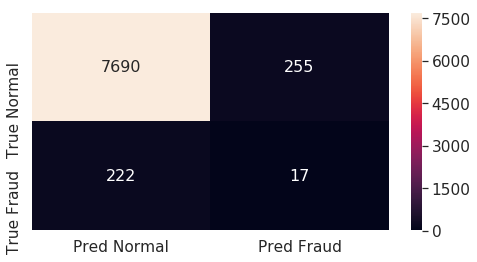

In [528]:
model_evaluate(ifo3,X3_val,y_val3)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.33965349197387695
accuracy :  0.946603128054741
sensitivity :  0.08786610878661087
specifity :  0.9724354940213971
precision :  0.0875
recall :  0.08786610878661087
f1 score :  0.08768267223382047
Confusion matrix
TP =  21 FP =  219 FN =  218 TN =  7726


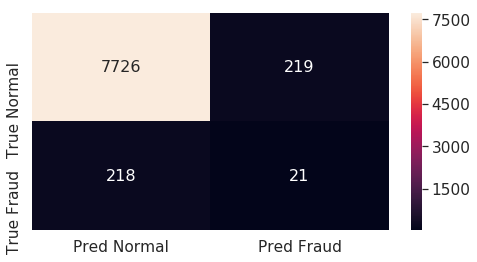

In [529]:
model_evaluate(ifo3, X3_test, y_test3)

### percobaan1.4 - 10 fitur terbaik

In [530]:
X4 = X[['field3','zip1','frek','field4','hour1','amount','flag2','field1','flag5','flag1']]
X4.head()

,field3,zip1,frek,field4,hour1,amount,flag2,field1,flag5,flag1
0,-2753,852,3,24,0,12.95,1,3,1,1
1,2429,950,6,14,0,11.01,0,3,1,0
2,2429,950,6,14,0,12.95,0,3,1,0
3,5195,750,2,9,0,12.95,1,3,1,1
4,809,601,2,7,1,12.95,0,2,1,1


In [0]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.2, random_state=1, stratify=y)
X4_train, X4_val, y4_train, y4_val = train_test_split(X4_train, y4_train, test_size=0.25, random_state=1, stratify=y4_train)

In [532]:
print(len(X4_train),len(X4_val),len(X4_test))

24550 8184 8184


In [0]:
y4train_ab = y4_train[y4_train==1]
y4val_ab = y4_val[y4_val==1]
y4test_ab = y4_test[y4_test==1]

In [0]:
y_test4 = np.array(y4_test)
y_train4=np.array(y4_train)
y_val4 = np.array(y4_val)

In [535]:
th_train4=len(y4train_ab)/len(y4_train)
th_test4=len(y4test_ab)/len(y4_test)
th_val4=len(y4val_ab)/len(y4_val)
print('threshold train =',th_train4, 'threshold test =', th_test4,'threshold val =', th_val4)

threshold train = 0.029246435845213848 threshold test = 0.029203323558162266 threshold val = 0.029203323558162266


In [536]:
ifo4 = iForest(X4_train, 100, 256, th_train4)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.3457367420196533
accuracy :  0.9464809384164223
sensitivity :  0.08786610878661087
specifity :  0.9723096286972939
precision :  0.08713692946058091
recall :  0.08786610878661087
f1 score :  0.0875
Confusion matrix
TP =  21 FP =  220 FN =  218 TN =  7725


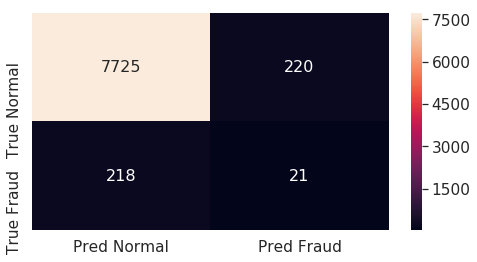

In [537]:
model_evaluate(ifo4,X4_val,y_val4)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.35643887519836426
accuracy :  0.947336265884653
sensitivity :  0.09623430962343096
specifity :  0.9729389553178099
precision :  0.09663865546218488
recall :  0.09623430962343096
f1 score :  0.09643605870020963
Confusion matrix
TP =  23 FP =  215 FN =  216 TN =  7730


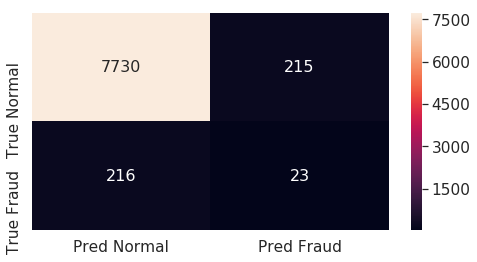

In [538]:
model_evaluate(ifo4, X4_test, y_test4)

### percobaan1.5 - 11 fitur terbaik

In [539]:
X5 = X[['field3','zip1','frek','field4','hour1','amount','flag2','field1','flag5','flag1','flag3']]
X5.head()

,field3,zip1,frek,field4,hour1,amount,flag2,field1,flag5,flag1,flag3
0,-2753,852,3,24,0,12.95,1,3,1,1,1
1,2429,950,6,14,0,11.01,0,3,1,0,0
2,2429,950,6,14,0,12.95,0,3,1,0,0
3,5195,750,2,9,0,12.95,1,3,1,1,1
4,809,601,2,7,1,12.95,0,2,1,1,0


In [0]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size=0.2, random_state=1, stratify=y)
X5_train, X5_val, y5_train, y5_val = train_test_split(X5_train, y5_train, test_size=0.25, random_state=1, stratify=y5_train)

In [541]:
print(len(X5_train),len(X5_val),len(X5_test))

24550 8184 8184


In [0]:
y5train_ab = y5_train[y5_train==1]
y5val_ab = y5_val[y5_val==1]
y5test_ab = y5_test[y5_test==1]

In [0]:
y_test5 = np.array(y5_test)
y_train5=np.array(y5_train)
y_val5 = np.array(y5_val)

In [544]:
th_train5=len(y5train_ab)/len(y5_train)
th_test5=len(y5test_ab)/len(y5_test)
th_val5=len(y5val_ab)/len(y5_val)
print('threshold train =',th_train5, 'threshold test =', th_test5,'threshold val =', th_val5)

threshold train = 0.029246435845213848 threshold test = 0.029203323558162266 threshold val = 0.029203323558162266


In [545]:
ifo5 = iForest(X5_train, 100, 256, th_train5)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.38214731216430664
accuracy :  0.948069403714565
sensitivity :  0.100418410041841
specifity :  0.973568281938326
precision :  0.10256410256410256
recall :  0.100418410041841
f1 score :  0.10147991543340379
Confusion matrix
TP =  24 FP =  210 FN =  215 TN =  7735


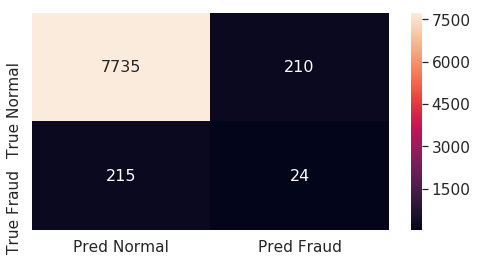

In [546]:
model_evaluate(ifo5,X5_val,y_val5)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.38242006301879883
accuracy :  0.945503421309873
sensitivity :  0.09205020920502092
specifity :  0.971176840780365
precision :  0.08764940239043825
recall :  0.09205020920502092
f1 score :  0.08979591836734695
Confusion matrix
TP =  22 FP =  229 FN =  217 TN =  7716


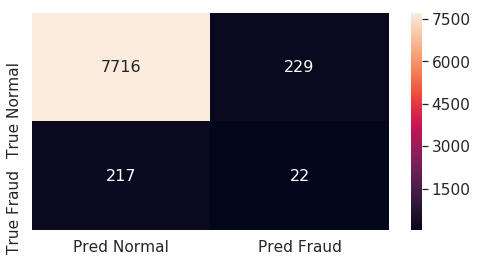

In [547]:
model_evaluate(ifo5, X5_test, y_test5)

### percobaan1.6 - 12 fitur terbaik

In [548]:
X6 = X[['field3','zip1','frek','field4','hour1','amount','flag2','field1','flag5','flag1','flag3','field2']]
X6.head()

,field3,zip1,frek,field4,hour1,amount,flag2,field1,flag5,flag1,flag3,field2
0,-2753,852,3,24,0,12.95,1,3,1,1,1,0
1,2429,950,6,14,0,11.01,0,3,1,0,0,0
2,2429,950,6,14,0,12.95,0,3,1,0,0,0
3,5195,750,2,9,0,12.95,1,3,1,1,1,0
4,809,601,2,7,1,12.95,0,2,1,1,0,0


In [0]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.2, random_state=1, stratify=y)
X6_train, X6_val, y6_train, y6_val = train_test_split(X6_train, y6_train, test_size=0.25, random_state=1, stratify=y6_train)

In [550]:
print(len(X6_train),len(X6_val),len(X6_test))

24550 8184 8184


In [0]:
y6train_ab = y6_train[y6_train==1]
y6val_ab = y6_val[y6_val==1]
y6test_ab = y6_test[y6_test==1]

In [0]:
y_test6= np.array(y6_test)
y_train6=np.array(y6_train)
y_val6= np.array(y6_val)

In [559]:
th_train6=len(y5train_ab)/len(y6_train)
th_test6=len(y5test_ab)/len(y6_test)
th_val6=len(y5val_ab)/len(y6_val)
print('threshold train =',th_train6, 'threshold test =', th_test6,'threshold val =', th_val6)

threshold train = 0.029246435845213848 threshold test = 0.029203323558162266 threshold val = 0.029203323558162266


In [560]:
ifo6 = iForest(X6_train, 100, 256, th_train6)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.36791467666625977
accuracy :  0.946603128054741
sensitivity :  0.1087866108786611
specifity :  0.9718061674008811
precision :  0.104
recall :  0.1087866108786611
f1 score :  0.1063394683026585
Confusion matrix
TP =  26 FP =  224 FN =  213 TN =  7721


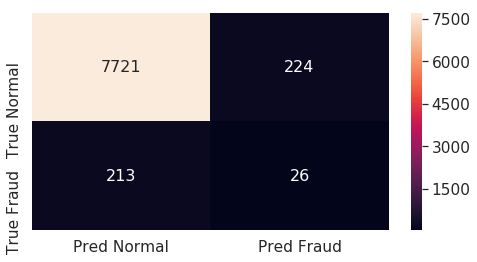

In [561]:
model_evaluate(ifo6,X6_val,y_val6)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.3862802982330322
accuracy :  0.9456256109481916
sensitivity :  0.100418410041841
specifity :  0.9710509754562618
precision :  0.09448818897637795
recall :  0.100418410041841
f1 score :  0.0973630831643002
Confusion matrix
TP =  24 FP =  230 FN =  215 TN =  7715


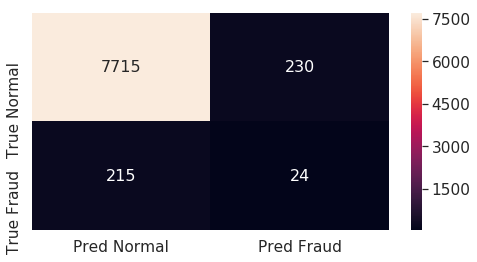

In [562]:
model_evaluate(ifo6, X6_test, y_test6)